In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection  import train_test_split
from sklearn import metrics
import pandas as pd

stock = pd.read_csv('StockMarket.csv', sep=',', header=0)
stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [18]:
stock[stock['Year']==2005].count()

Year         252
Lag1         252
Lag2         252
Lag3         252
Lag4         252
Lag5         252
Volume       252
Today        252
Direction    252
dtype: int64

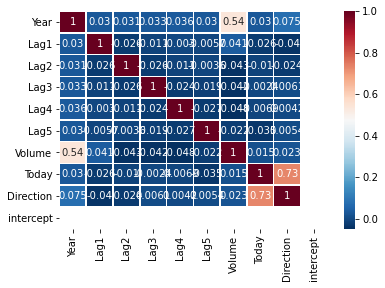

In [37]:
sc = stock.corr(method ='pearson') 
import seaborn as sb
sb.heatmap(sc, 
            xticklabels=sc.columns,
            yticklabels=sc.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [38]:
stock['Direction'] = stock['Direction'].astype('category').cat.codes
stock.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,intercept
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608,NaN
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757,NaN
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081,NaN
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132,NaN
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215,NaN
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423,NaN
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951,NaN
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563,NaN
Direction,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


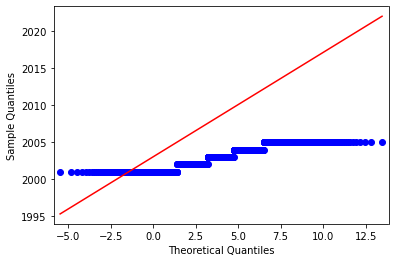

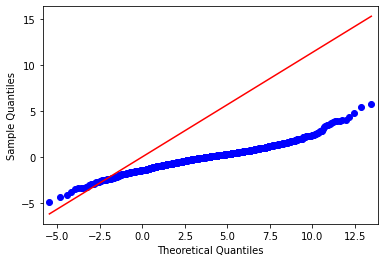

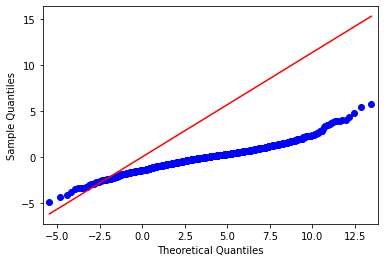

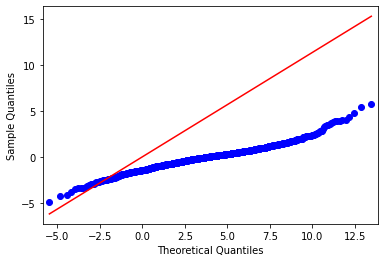

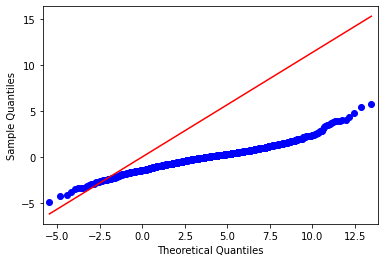

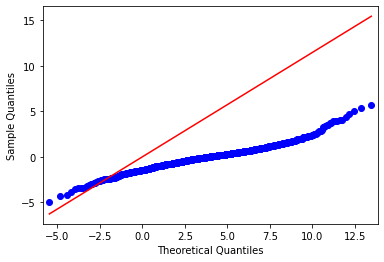

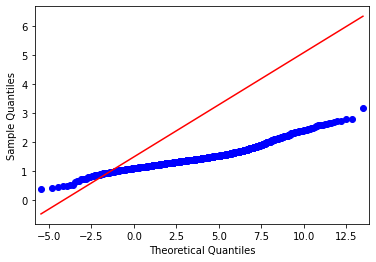

In [39]:
import statsmodels.api as sm
import pylab
sm.qqplot(stock['Year'], loc = 4, scale = 3, line='s')
sm.qqplot(stock['Lag1'], loc = 4, scale = 3, line='s')
sm.qqplot(stock['Lag2'], loc = 4, scale = 3, line='s')
sm.qqplot(stock['Lag3'], loc = 4, scale = 3, line='s')
sm.qqplot(stock['Lag4'], loc = 4, scale = 3, line='s')
sm.qqplot(stock['Lag5'], loc = 4, scale = 3, line='s')
sm.qqplot(stock['Volume'], loc = 4, scale = 3, line='s')

pylab.show()

In [60]:
"""
Q 1-2. Let’s use data before 2005 for training and 2005 data for testing. 
Try to fit a Naïve Bayes classifier in order to predict Direction using 
independent variables (excluding Today). Explain the prediction result 
using confusion matrix and performance measures (accuracy, precision, 
recall,..etc). 

"""

# split data
stock['intercept']=1.0
stock['Direction[Up]']=stock['Direction'].astype('category').cat.codes
y_train=stock.loc[stock['Year'] < 2005,['Direction[Up]']]
X_train=stock.loc[stock['Year'] < 2005,['Lag1', 'Lag2','intercept']]
y_test=stock.loc[stock['Year'] == 2005,['Direction[Up]']]
X_test=stock.loc[stock['Year'] == 2005,['Lag1', 'Lag2','intercept']]

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5952380952380952
[[ 29  82]
 [ 20 121]]
              precision    recall  f1-score   support

           0       0.59      0.26      0.36       111
           1       0.60      0.86      0.70       141

    accuracy                           0.60       252
   macro avg       0.59      0.56      0.53       252
weighted avg       0.59      0.60      0.55       252



/Users/Kimberly/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [61]:
"""
Q 1-3. Compare the result from the Naïve Bayes classifier to that of 
logistic regression you obtained in Homework1.
"""

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

y_pred=logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_pred,Y_test)

print("Accuracy:",logmodel.score(X_test,Y_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 0.5595238095238095
[[ 35  76]
 [ 35 106]]
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       111
           1       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252

